# Falling Coffee Filter

The discussion on this notebook follows the text pretty closely until the end. Refer to pages 59 (bottom) through 63.

The following data were collected, tracking a coffee filter that was released to fall under the influence of gravity. You will soon learn the data have many of the complexities of real data with errors. First off, note the first time is not zero. Also note that you can assume the $\Delta t$ is about 0.0247 and not variable (even though it does vary).

`
//Falling coffee filter
//Time ( s )	Position ( m )
0.2055	0.4188
0.2302	0.4164
0.255	0.4128
0.2797	0.4082
0.3045	0.4026
0.3292	0.3958
0.3539	0.3878
0.3786	0.3802
0.4033	0.3708
0.428	0.3609
0.4526	0.3505
0.4773	0.34
0.502	0.3297
0.5266	0.3181
0.5513	0.3051
0.5759	0.2913
0.6005	0.2788
0.6252	0.2667
0.6498	0.2497
0.6744	0.2337
0.699	0.2175
0.7236	0.2008
0.7482	0.1846
0.7728	0.1696
0.7974	0.1566
0.822	0.1393
0.8466	0.1263
`

### Problem 1

Cut and paste the data into a file. Read the file and plot the positions as a function of time.

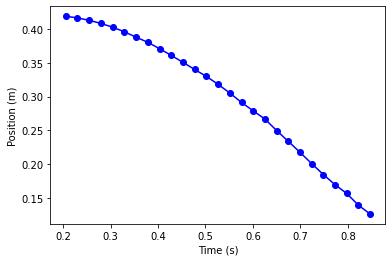

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = np.loadtxt("./data.txt", delimiter="\t", skiprows=1)
time = data[:,0]
position = data[:, 1]

plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.plot(time, position, 'bo-')
plt.show()

## Computing derivatives

As you are seeing in class, derivatives of quantities are critical to our understanding of the world. With position data, we can find velocity and acceleration from derivatives. A good balance between accuracy and simplicity is achieved with central finite differencing schemes. The formulas are as follows

$$v(t) = \frac{y(t + \Delta t) - y(t - \Delta t)}{2\Delta t}$$

and for acceleration

$$a(t) = \frac{y(t + \Delta t) - 2y(t) + y(t - \Delta t)}{\Delta t^2}.$$

### Problem 2
Determine both first and second derivatives of position; velocity and acceleration respectively. Plot them. Give careful thought to what the values on the time axis should be. Make clear distinctions between the points the derivatives are computed at and the lines connecting them. Label axes. Estimate, by inspection, the terminal velocity of the coffee filter. Comment on any unusual features you see in the data. Finally, plot $a$ vs $v$ and see if that provides addition insight into the terminal velocity.


In [2]:
def v_t(time, position):
    """
    Look one step ahead of current time and one step back to compute the velocity according to:

    v(t) = (y(t - dt) - y(t + dt)) / (2 * dt)

    where dt is the average time step over the window of 3 discrete points.
    :param time: time values
    :param position: position values
    :return: velocity values
    """
    velocity = []
    for i in range(len(time) - 3):
        p_window = position[i: i + 3]
        t_window = time[i: i + 3]
        dt = (t_window[1] - t_window[0] + t_window[2] - t_window[1]) / 2
        v_estimate = (p_window[2] - p_window[0]) / (2 * dt)
        velocity.append(v_estimate)

    return velocity


def a_t(time, position):
    """
    Look one step ahead of current time and one step back to compute the velocity according to:

    a_t = (y(t - dt) - 2 * y(t) + y(t + dt)) / (dt ** 2)

    where dt is the average time step over the window of 3 discrete points.
    :param time: time values
    :param position: position values
    :return: acceleration values
    """

    acceleration = []
    for i in range(len(time) - 3):
        p_window = position[i: i + 3]
        t_window = time[i: i + 3]
        dt = (t_window[1] - t_window[0] + t_window[2] - t_window[1]) / 2
        a_estimate = (p_window[2] - (2 * p_window[1]) + p_window[0]) / (dt ** 2)
        acceleration.append(a_estimate)

    return acceleration

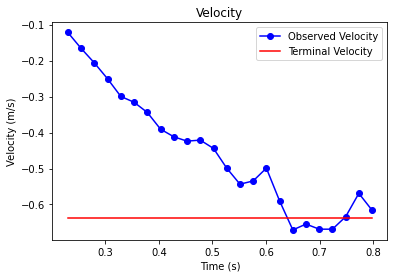

In [3]:
# velocity plot
velocity = v_t(time, position)
terminal_v = np.mean(velocity[-8: -1])
terminal_v_full = np.full_like(velocity, terminal_v)
plt.title("Velocity")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.plot(time[1:-2], velocity, 'bo-', label="Observed Velocity")
plt.plot(time[1:-2], terminal_v_full, 'r-', label="Terminal Velocity")
plt.legend()
plt.show()

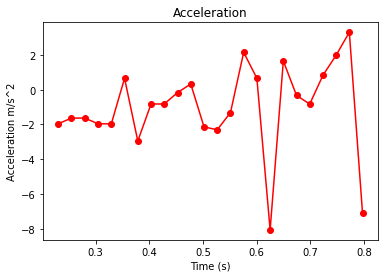

In [4]:
# acceleration plot
acceleration = a_t(time, position)
plt.title("Acceleration")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration m/s^2")
plt.plot(time[1:-2], acceleration, 'ro-')
plt.show()

## Answer
---
Terminal velocity is somewhere around -0.6 m/s. There are unusual spikes dips in the acceleration plot where acceleration
drops abruptly. This could be due to experimental factors not directly annotated in the data such as a gust of wind or non-uniform
orientation when the object was falling.

---

### Friction on a falling body

The role of friction on a falling body can generally be modeled with the simple modification of Newton's Second Law. Assume there is another force, friction, that opposes motion. Now there are two forces, gravity pulling the object down, and friction, pushing the object back up. We call the frictional forces *drag*. It can be modeled as

$$F_d = C_1v$$

or 

$$F_d = C_2v^2$$ 

depending on the speed and diameter of the objects. 

These are *phenomenological laws* - they have been found to work through experimentation, but their range of validity is small.

Eventually, terminal velocity is reached. This is the point where the drag resistance is equal to gravity and the object's speed no longer changes.

$$ mg = C_1 v_t \rightarrow C_1 = \frac{mg}{v_t}$$

and for quadratic drag

$$ mg = C_2 v_t^2 \rightarrow C_2= \frac{mg}{v_t^2}$$

While just minor algebra, these expression relate the constants in terms of things you can measure - the terminal velocity

$$F_d = \frac{mg}{v_t}v$$

and

$$F_d = mg \left(\frac{v}{v_t}\right)^2.$$ 

We're close to completion. Finally, write the complete balance of forces for a falling body with friction

$$F = -mg\left(1 - \frac{v}{v_t}\right)$$

and

$$F = -mg\left(1 - \left(\frac{v}{v_t}\right)^2\right)$$ 

#### Problem 3
Chose the appropriate numerical algorithm from last week to integrate the system of ODEs resulting from both linear and quadratic drag forces. Experiment with the values of $v_t$ to try and get the best possible fit to the data. Comment on which of the two drag relations appears to work better.

In [5]:
def Euler(y, f, t, d_t, args):
    """For some odd reason that I am unable to elucidate, I can not have all of the bellow code on one line..."""

    f = f(t, y, *args) * d_t
    state = y + f

    return state

def EulerCromer(y, f, t, d_t, args):
    y_end = Euler(y, f, t, d_t, args)
    t_end = t + d_t
    return y + f(t_end, y_end, *args) * d_t

def EulerRichardson(y, f, t, d_t, args):
    y_mid = Euler(y, f, t, d_t / 2, args)
    t_mid = t + d_t / 2
    return y + f(t_mid, y_mid, *args) * d_t


def solve_ode(f, tspan, y0, method = Euler, *args, **options):

    t_0 = tspan[0]
    t_f = tspan[1]
    t = [t_0]
    state = [y0]
    d_t = options["first_step"]
    while t[-1] < t_f:
        state.append(method(state[-1], f, t[-1], d_t, args))
        t.append(t[-1] + d_t)

    return np.array(t), np.array(state)


def air_drag(t, y, g):
    """
    Non quadratic air drag.
    dy/dt =  v
    dv/dt = -g * (1 - (terminal_vel / velocity))
    """
    term_v = -0.6366
    dy_dt = y[1]
    dv_dt = -g * (1 - (y[1] / term_v))

    return np.array((dy_dt, dv_dt))

def quad_air_drag(t, y, g):
    """
    Non quadratic air drag.
    dy/dt =  v
    dv/dt = -g * (1 - ((terminal_vel / velocity) ** 2))
    """
    term_v = -0.6366
    dy_dt = y[1]
    dv_dt = -g * (1 - ((y[1] / term_v) ** 2))

    return np.array((dy_dt, dv_dt))

In [6]:
d_t = 0.001
g = np.array(9.8)
v_0 = velocity[0]
y_0 = position[0]
y = np.array((y_0, v_0))
t_span = (time[1], time[-2])

t, y_euler = solve_ode(air_drag, t_span, y, Euler, g, first_step=d_t)
t, y_chromer = solve_ode(air_drag, t_span, y, EulerCromer, g, first_step=d_t)
t, y_richard = solve_ode(air_drag, t_span, y, EulerRichardson, g, first_step=d_t)


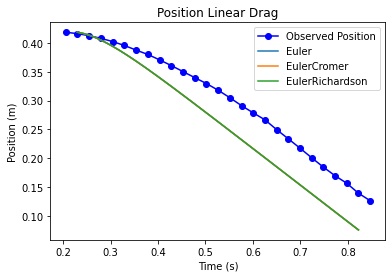

In [7]:
euler_pos = y_euler[:, 0]
chromer_pos = y_chromer[:, 0]
richard_pos = y_richard[:, 0]

plt.title("Position Linear Drag")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.plot(time, position, 'bo-', label="Observed Position")
plt.plot(t, euler_pos, label="Euler")
plt.plot(t, chromer_pos, label="EulerCromer")
plt.plot(t, richard_pos, label="EulerRichardson")
plt.legend()
plt.show()

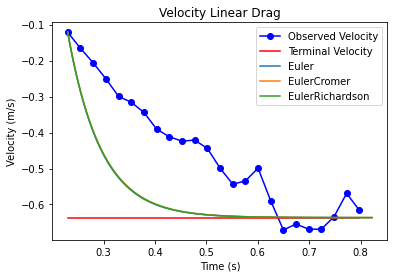

In [8]:
# velocity plots

euler_vel = y_euler[:, 1]
chromer_vel = y_chromer[:, 1]
richard_vel = y_richard[:, 1]

velocity = v_t(time, position)
terminal_v = np.mean(velocity[-8: -1])
terminal_v_full = np.full_like(velocity, terminal_v)
plt.title("Velocity Linear Drag")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.plot(time[1:-2], velocity, 'bo-', label="Observed Velocity")
plt.plot(time[1:-2], terminal_v_full, 'r-', label="Terminal Velocity")
plt.plot(t, euler_vel, label="Euler")
plt.plot(t, chromer_vel, label="EulerCromer")
plt.plot(t, richard_vel, label="EulerRichardson")
plt.legend()
plt.show()


In [9]:
d_t = 0.001
g = np.array(9.8)
v_0 = velocity[0]
y_0 = position[0]
y = np.array((y_0, v_0))
t_span = (time[1], time[-2])

t, y_euler = solve_ode(quad_air_drag, t_span, y, Euler, g, first_step=d_t)
t, y_chromer = solve_ode(quad_air_drag, t_span, y, EulerCromer, g, first_step=d_t)
t, y_richard = solve_ode(quad_air_drag, t_span, y, EulerRichardson, g, first_step=d_t)


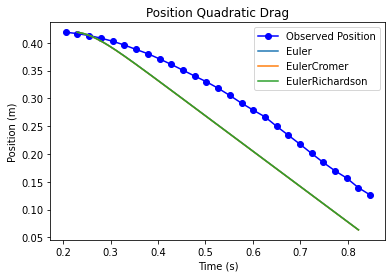

In [10]:
euler_pos = y_euler[:, 0]
chromer_pos = y_chromer[:, 0]
richard_pos = y_richard[:, 0]

plt.title("Position Quadratic Drag")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.plot(time, position, 'bo-', label="Observed Position")
plt.plot(t, euler_pos, label="Euler")
plt.plot(t, chromer_pos, label="EulerCromer")
plt.plot(t, richard_pos, label="EulerRichardson")
plt.legend()
plt.show()

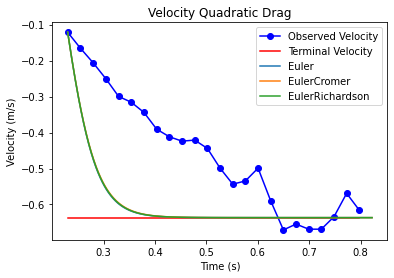

In [11]:
# velocity plots

euler_vel = y_euler[:, 1]
chromer_vel = y_chromer[:, 1]
richard_vel = y_richard[:, 1]

velocity = v_t(time, position)
terminal_v = np.mean(velocity[-8: -1])
terminal_v_full = np.full_like(velocity, terminal_v)
plt.title("Velocity Quadratic Drag")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.plot(time[1:-2], velocity, 'bo-', label="Observed Velocity")
plt.plot(time[1:-2], terminal_v_full, 'r-', label="Terminal Velocity")
plt.plot(t, euler_vel, label="Euler")
plt.plot(t, chromer_vel, label="EulerCromer")
plt.plot(t, richard_vel, label="EulerRichardson")
plt.legend()
plt.show()

## Answer
---
Simple linear drag seems to fit the data better than a quadratic drag. It also appears that for the chosen parameters,
each of the ODE methods produces a qualitatively similar prediction.

---

### Generalization of drag force

While 'low' and 'high' speeds are not well characterized, and it's not easy to decide which applies to the coffee filter, it is possible to generalize what we don't know and systematically explore it. 

Let us suppose the coffee filter is in the process of transitioning from a linear to a quadratic drag force. Write the balance of forces on the falling body as:

$$F = -mg\left( 1 - \left( \frac{v}{v_t}\right)^{\alpha} \right)$$

#### Problem 4
Code up this generalized drag force and plot the results of the ODE solver on the same axes as the position data. Through visual inspection, come up with the best fit you can.


In [12]:
def general_air_drag(t, y, args):
    """
    Non quadratic air drag.
    dy/dt =  v
    dv/dt = -g * (1 - ((terminal_vel / velocity) ** 2))
    """
    g = args[0]
    alpha = args[1]
    term_v = -0.6366
    dy_dt = y[1]
    dv_dt = -g * (1 - ((y[1] / term_v) ** alpha))

    return np.array((dy_dt, dv_dt))

d_t = 0.001
g = np.array(9.8)
v_0 = velocity[0]
y_0 = position[0]
y = np.array((y_0, v_0))
t_span = (time[1], time[-2])

position_list = []
velocity_list = []
alphas = np.linspace(0, 0.5, 5)



for alpha in alphas:
    t, state = solve_ode(general_air_drag, t_span, y, EulerRichardson, [g, alpha], first_step=d_t)
    position_list.append(state[:, 0])
    velocity_list.append(state[:, 1])

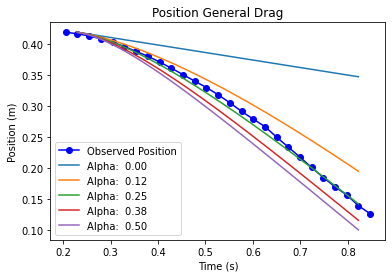

In [13]:
# position plot
plt.title("Position General Drag")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.plot(time, position, 'bo-', label="Observed Position")
for i in range(len(alphas)):
    plt.plot(t, position_list[i], label=f"Alpha: {alphas[i]: .2f}")
plt.legend()
plt.show()

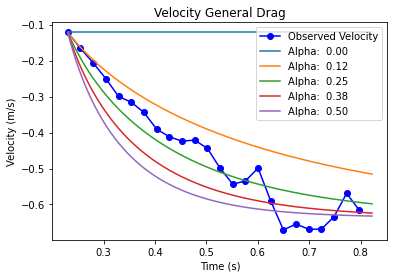

In [14]:
# position plot
plt.title("Velocity General Drag")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.plot(time[1: -2], velocity, 'bo-', label="Observed Velocity")
for i in range(len(alphas)):
    plt.plot(t, velocity_list[i], label=f"Alpha: {alphas[i]: .2f}")
plt.legend()
plt.show()

## Answer
---
Qualitatively, it appears that an alpha = 0.25 gives the best fit for both velocity and position.

---

### Problem 5

Finally, return to your MCMC machinery and apply it to this problem. Use it to determine the optimal values of both $\alpha$ and $v_t$. Also determine the distributions for each variable. Finally, plot $\alpha$ vs. $v_t$ and see if you can witness the chain converging about the best parameters, and the exploration of the space around the optimal parameters. Plot the results of running the simulations with both the most likely as well as the average values of $v_t$ and $\alpha$. Comment on all of these plots with a specific mind to the question of how well the parameters fit the distribution, and how much uncertainty there is in the parameters.

Some helpful parameters include:
* use step sizes for 0.01 $\alpha$ and $v_t$.
* use a $\sigma^2$ in the log likelihood function value of .0001. Based on the data, say why is this value reasonable?
* create bounds on the variables based on your previous explorations. These should prevent the search from going outside a specified range. This is a form of including *priors* in the simulation.
* Do 20,000 burn in steps and 80,000 steps.
* Sample every 500 points in the chain.
* Start the process with $\alpha$ = $v_t$ = 1.0.

Some general hints include:
* The log likelihood function is $-\frac{1}{2}\sum_i \left ( y_i^o - y_i^m \right )^2/\sigma^2$ where $i$ are the individual data points (positions only), $y_i^o$ is the observed data point, and $y_i^m$ is a modeled data point.
* Make sure the modeled data points are at the same times as the observed ones. Perhaps use interpolation?
* Keep track of the acceptance rate. You should be around 23% with the parameters provided.


In [77]:
from IPython.display import clear_output

def mcmc_air_drag(t, y, args):
    """
    Non quadratic air drag.
    dy/dt =  v
    dv/dt = -g * (1 - ((terminal_vel / velocity) ** 2))
    """
    g = args[0]
    alpha = args[1]
    term_v = -args[2]
    dy_dt = y[1]
    dv_dt = -g * (1 - ((y[1] / term_v) ** alpha))

    return np.array((dy_dt, dv_dt))

def MCMC(steps, time, position, velocity):

    # initialize parameters alpha and term_v
    params = np.array([1, 1])
    chain = [params]
    accepted = 0

    # ode solver stuffs
    d_t = 0.02
    g = np.array(9.8)
    v_0 = velocity[0]
    y_0 = position[1]
    state = np.array((y_0, v_0))
    t_span = (time[1], time[-2])
    t, _ = solve_ode(mcmc_air_drag, t_span, state, EulerRichardson, [g, params[0], params[1]], first_step=d_t)
    observed_pos = np.interp(t, time[1:-2], position[1:-2])


    for step in range(steps):
        clear_output(wait=True)
        if step % 1000 == 0:
            print(f"Step: {step}    Accepted: {accepted}\n"
                  f"Progess: {step/steps * 100 :.2f}%")

        # this alternates which parameter we are perturbing
        if step % 2 == 0:
            perturb = np.array((np.random.choice([-0.01, 0.01]), 0))
        else:
            perturb = np.array((0, np.random.choice([-0.01, 0.01])))

        # check the perturbation
        proposal = chain[-1] + perturb
        ode_t, prop_data = solve_ode(mcmc_air_drag, t_span, state, EulerRichardson, [g, proposal[0], proposal[1]], first_step=d_t)
        prop_pos = prop_data[:, 0]

        old_param = chain[-1]
        ode_t, old_data = solve_ode(mcmc_air_drag, t_span, state, EulerRichardson, [g, old_param[0], old_param[1]], first_step=d_t)
        old_pos = old_data[:, 0]

        prop_sum = np.sum((observed_pos - prop_pos) ** 2 )
        prop_std = np.std(observed_pos - prop_pos)
        prop_likelihood = -0.5 * prop_sum / (prop_std ** 2)

        old_sum = np.sum((observed_pos - old_pos) ** 2)
        old_std = np.std(observed_pos - old_pos)
        old_likelihood = -0.5 * old_sum / (old_std ** 2)
        if old_likelihood - prop_likelihood < 0 or prop_likelihood - old_likelihood < np.log(np.random.random()):
            chain.append(proposal)
            accepted += 1

    print(f"Acceptance: {accepted/ steps * 100:.2f}%")
    return np.array(chain)

chain = MCMC(int(1e5), time, position, velocity)

Acceptance: 39.06%


In [82]:
alpha = chain[:, 0]
alpha = [alpha[i] for i in range(0, len(alpha), 500)]
term_v = chain[:, 1]
term_v = [term_v[i] for i in range(0, len(term_v), 500)]

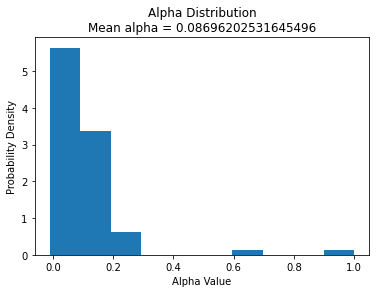

In [83]:
# Alpha distribution
plt.title(f"Alpha Distribution\n"
          f"Mean alpha = {np.mean(alpha)}")
plt.xlabel("Alpha Value")
plt.ylabel("Probability Density")
plt.hist(alpha, density=True)
plt.show()

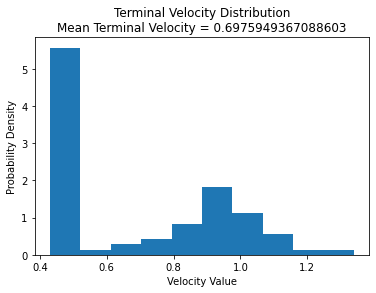

In [84]:
# terminal velocity distribution
plt.title(f"Terminal Velocity Distribution\n"
          f"Mean Terminal Velocity = {np.mean(term_v)}")
plt.xlabel("Velocity Value")
plt.ylabel("Probability Density")
plt.hist(term_v, density=True)
plt.show()

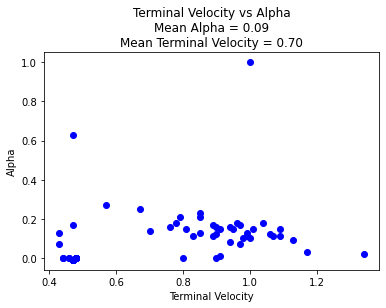

In [85]:
# alpha vs terminal velocity
plt.title(f"Terminal Velocity vs Alpha\n"
          f"Mean Alpha = {np.mean(alpha):.2f}\n"
          f"Mean Terminal Velocity = {np.mean(term_v):.2f}")
plt.xlabel("Terminal Velocity")
plt.ylabel("Alpha")
plt.plot(term_v, alpha, 'bo')
plt.show()


## Answer
---
I am fairly certain that MCMC is voodoo at this point, and I have no idea how to make it work.
I have no idea why these two values seem to be switched and spent a lot of time confirming that they are not.

---